# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

In [2]:
import pandas as pd

# Load the dataset
file_path = 'tripadvisor_review.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the general information of the dataset
data_head = data.head()
data_info = data.info()
data.describe(), data_head, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


(       Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
 count  980.000000  980.000000  980.000000  980.000000  980.000000  980.000000   
 mean     0.893194    1.352612    1.013306    0.532500    0.939735    1.842898   
 std      0.326912    0.478280    0.788607    0.279731    0.437430    0.539538   
 min      0.340000    0.000000    0.130000    0.150000    0.060000    0.140000   
 25%      0.670000    1.080000    0.270000    0.410000    0.640000    1.460000   
 50%      0.830000    1.280000    0.820000    0.500000    0.900000    1.800000   
 75%      1.020000    1.560000    1.572500    0.580000    1.200000    2.200000   
 max      3.220000    3.640000    3.620000    3.440000    3.300000    3.760000   
 
        Category 7  Category 8  Category 9  Category 10  
 count  980.000000  980.000000  980.000000   980.000000  
 mean     3.180939    2.835061    1.569439     2.799224  
 std      0.007824    0.137505    0.364629     0.321380  
 min      3.160000    2.4200

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

#### Subsample Correlation Plots
We created correlation plots for 10 randomly chosen subsamples of 100 entries each to observe potential relationships between categories. These plots can reveal how different categories might influence one another.

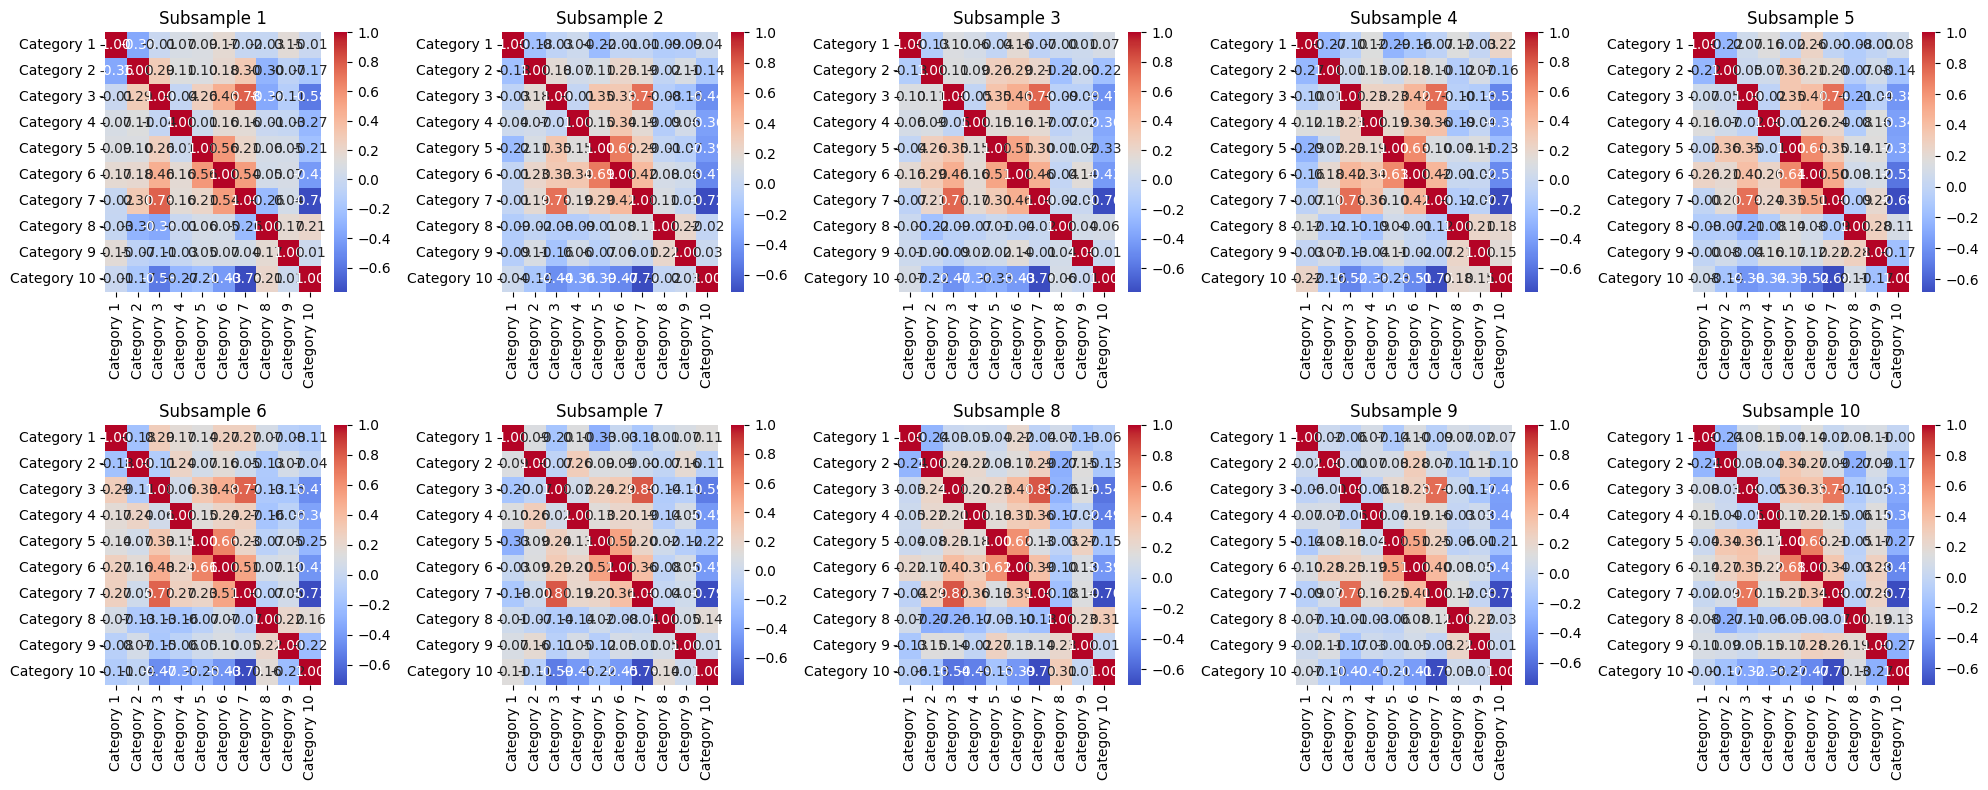

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to create correlation plots for randomly sampled subsets
def create_correlation_plots(data, num_samples=10, sample_size=100):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    for i in range(num_samples):
        # Take a random subsample
        subsample = data.sample(n=sample_size, random_state=i)
        # Compute the correlation matrix
        corr_matrix = subsample.drop("User ID", axis=1).corr()
        # Plot the correlation matrix
        sns.heatmap(corr_matrix, ax=axes[i], annot=True, cmap='coolwarm', fmt=".2f")
        axes[i].set_title(f"Subsample {i+1}")
    plt.tight_layout()
    plt.show()

# Create correlation plots
create_correlation_plots(data)


##### Observation

The correlation plots varied by subsample, indicating diverse relationships depending on the subset of data.

**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**

**TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe**

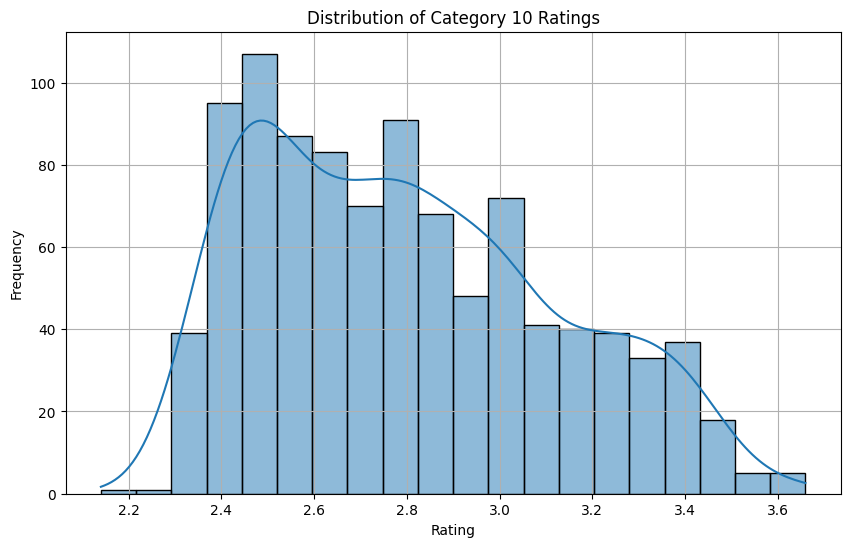

In [5]:
# Plotting the distribution of the hypothetical target variable 'Category 10'
plt.figure(figsize=(10, 6))
sns.histplot(data['Category 10'], kde=True, bins=20)
plt.title('Distribution of Category 10 Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Treated 'Category 10' as a hypothetical target variable and examined its distribution to detect any significant imbalance.

Observation: The distribution was relatively smooth with a slight skew, suggesting a fairly balanced dataset for this category.

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

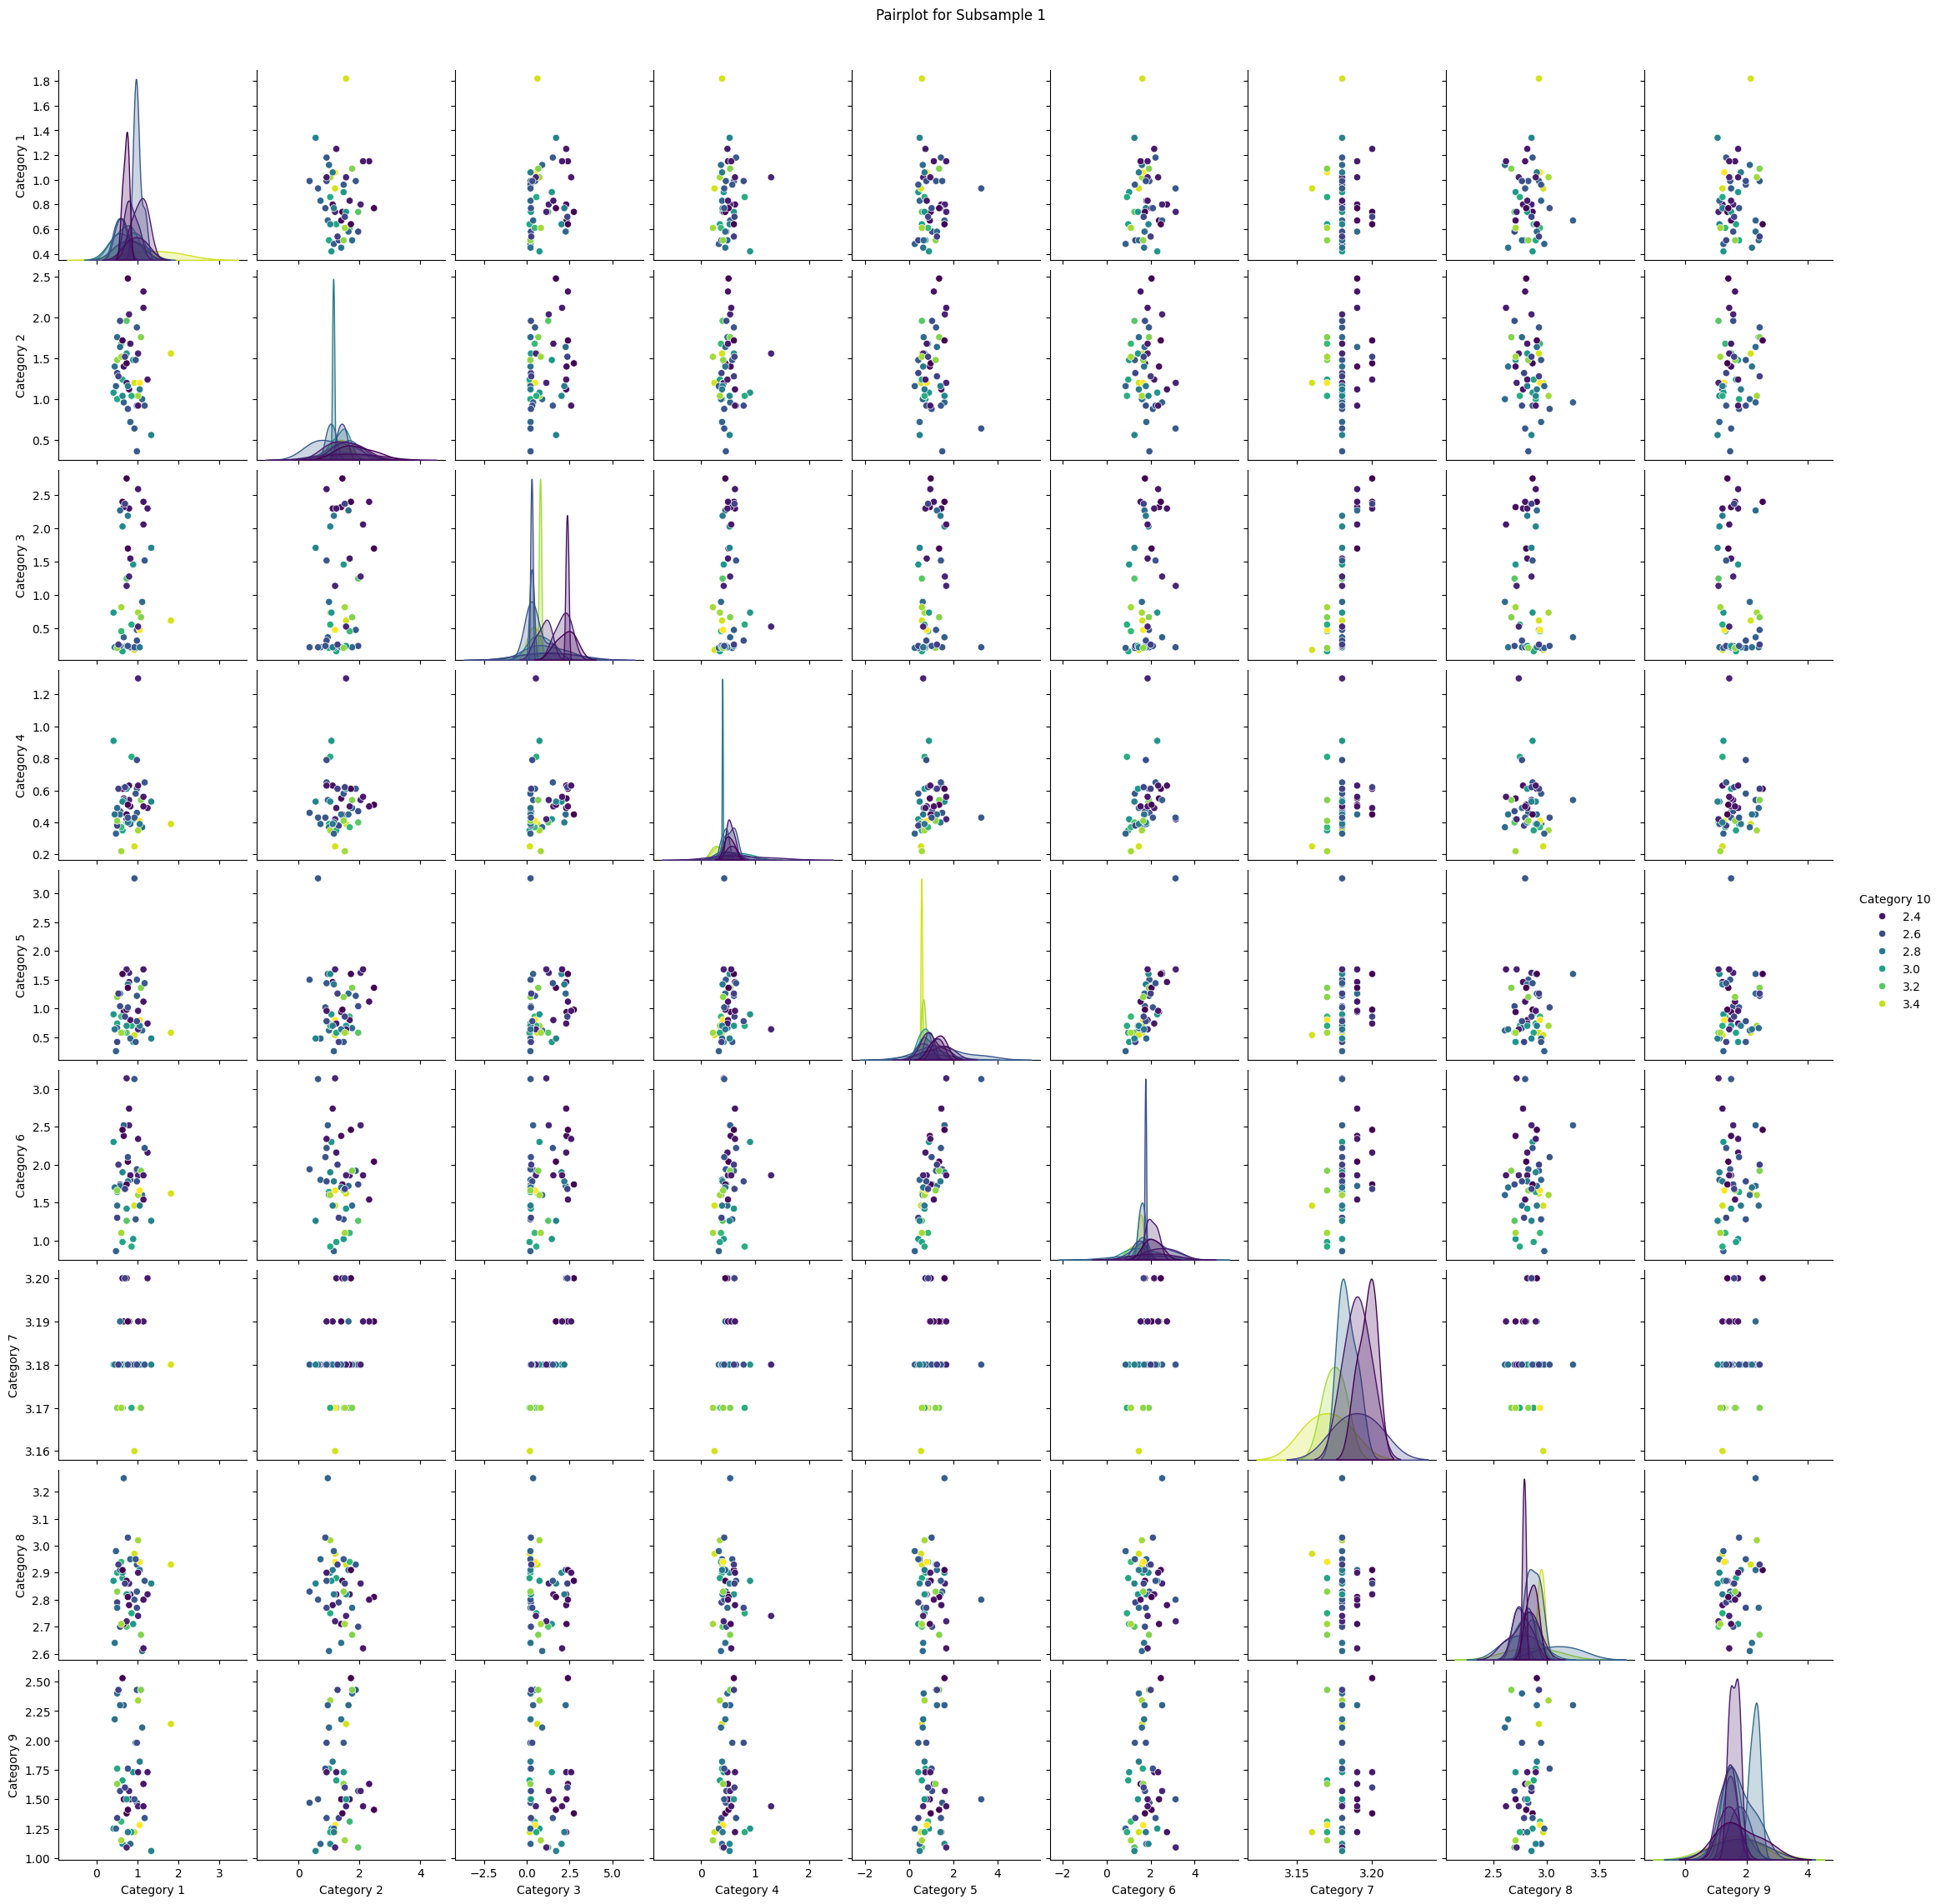

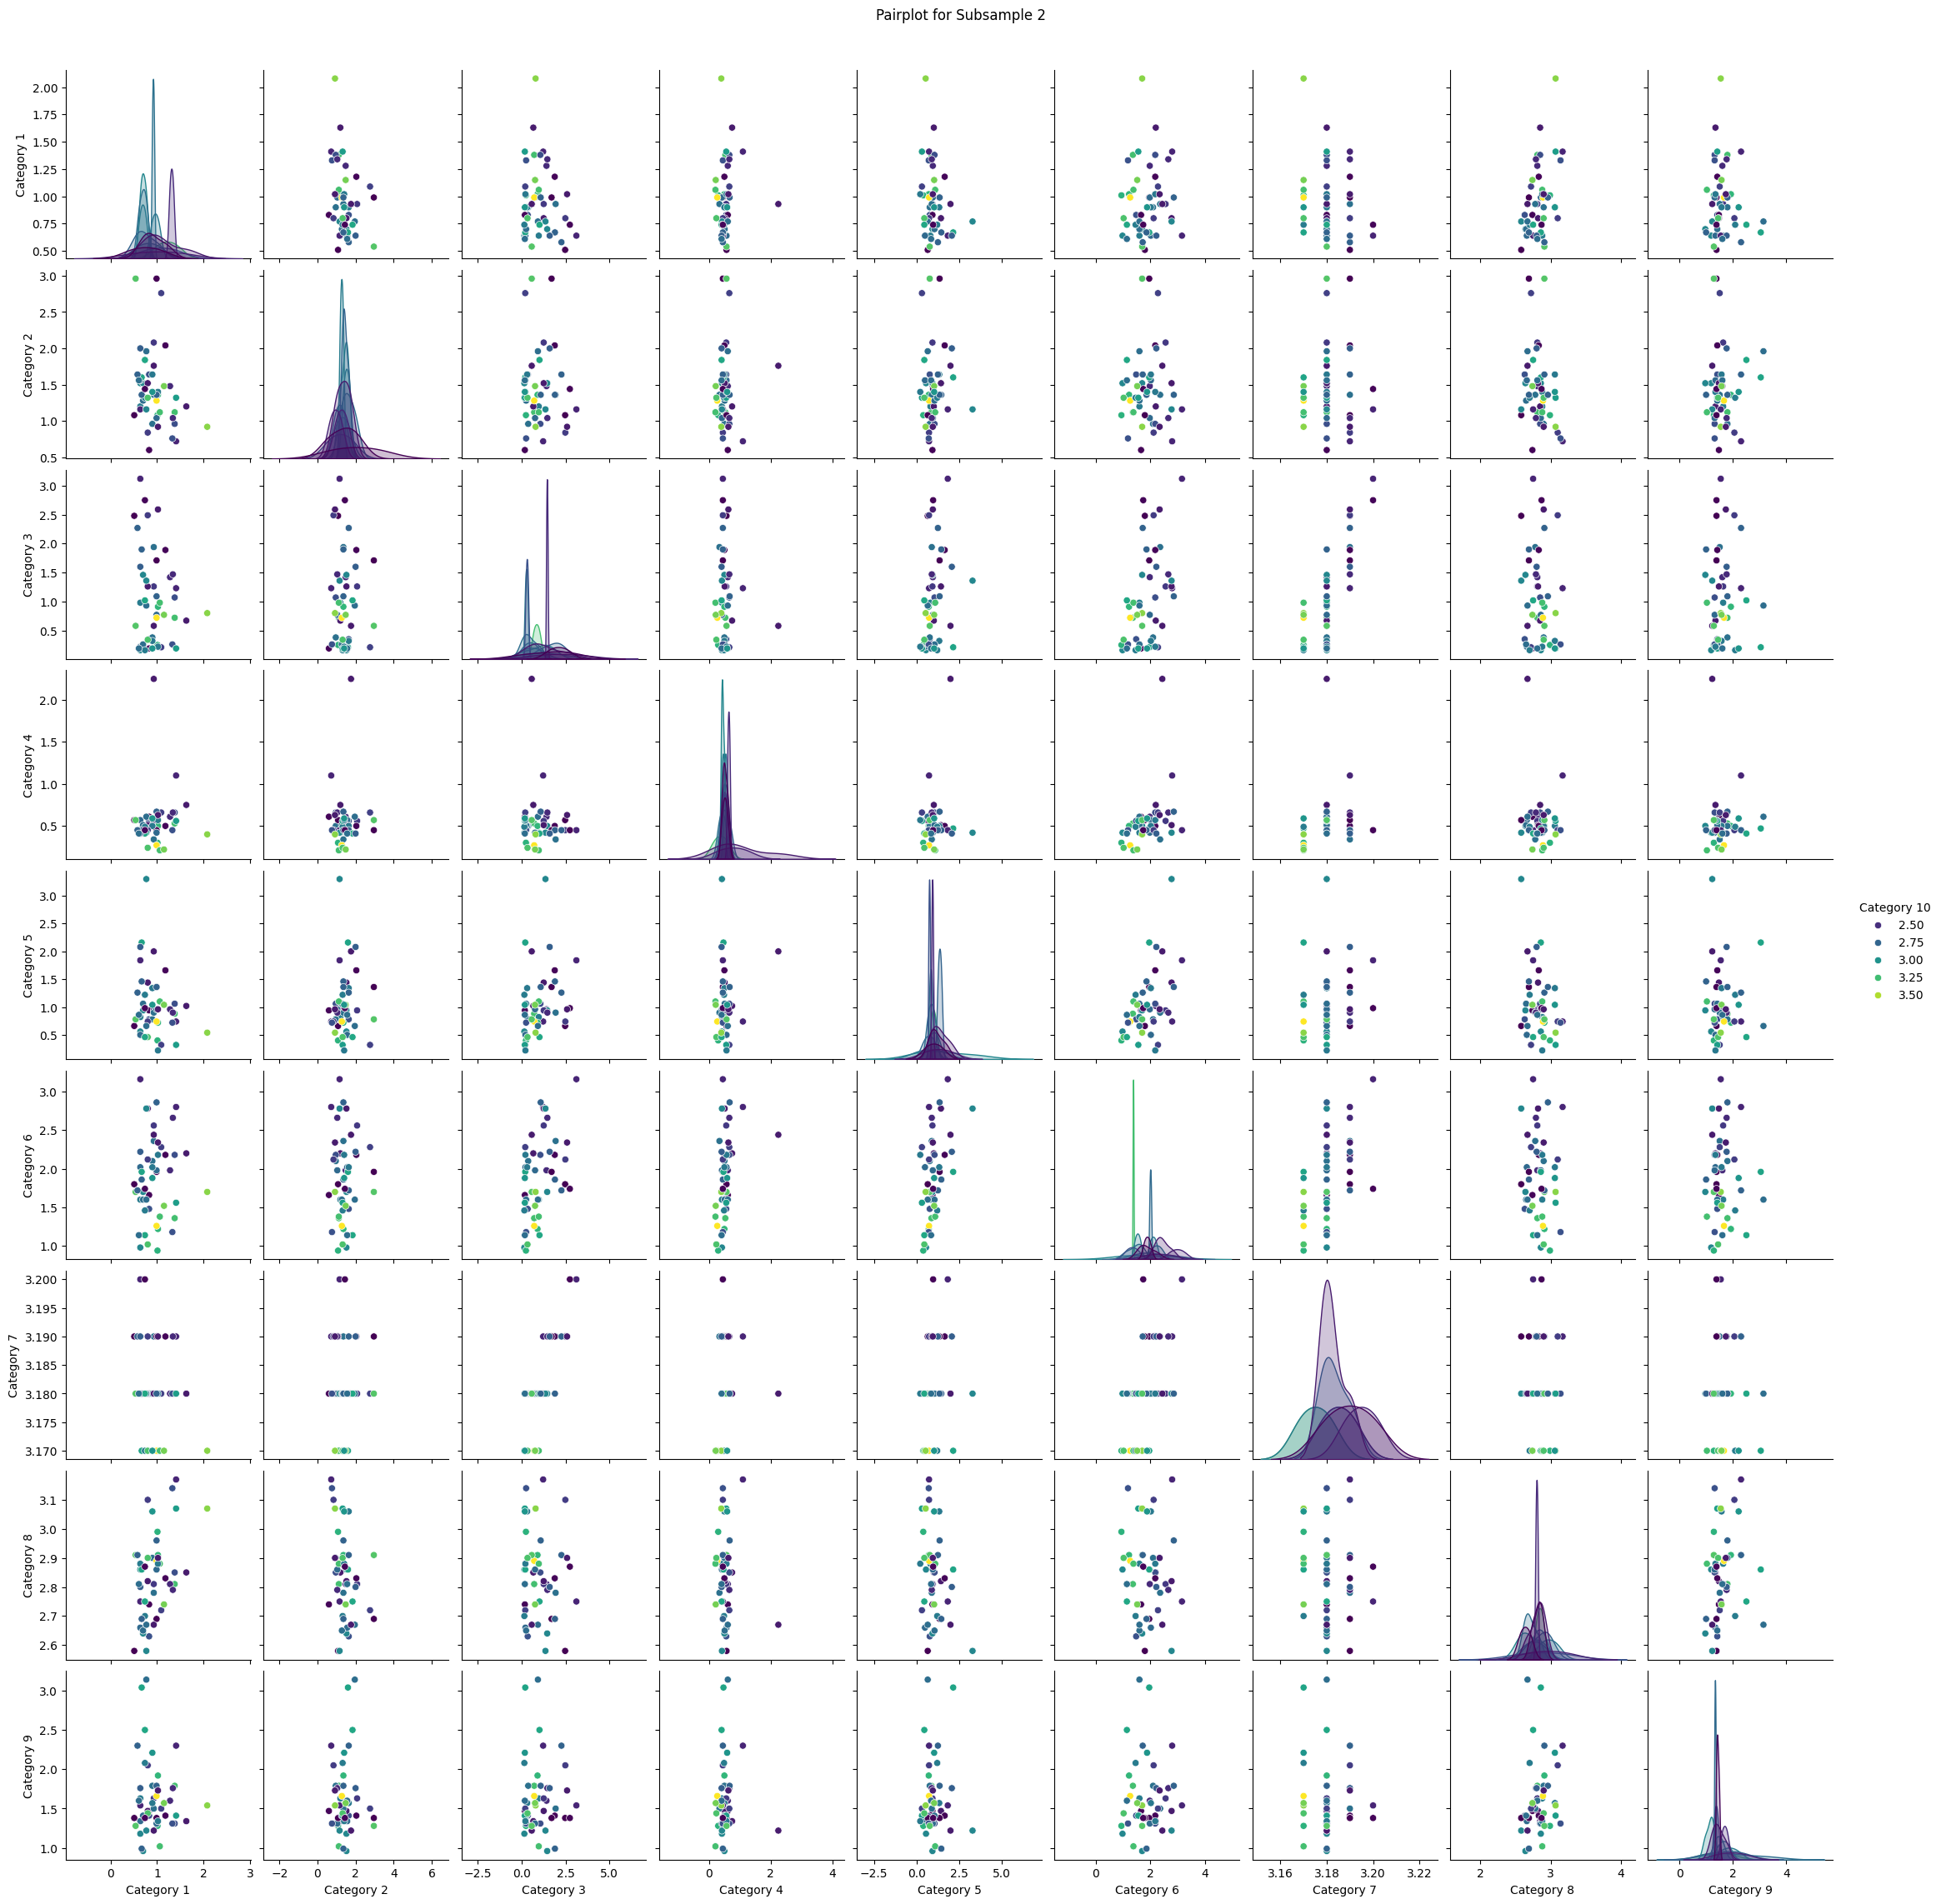

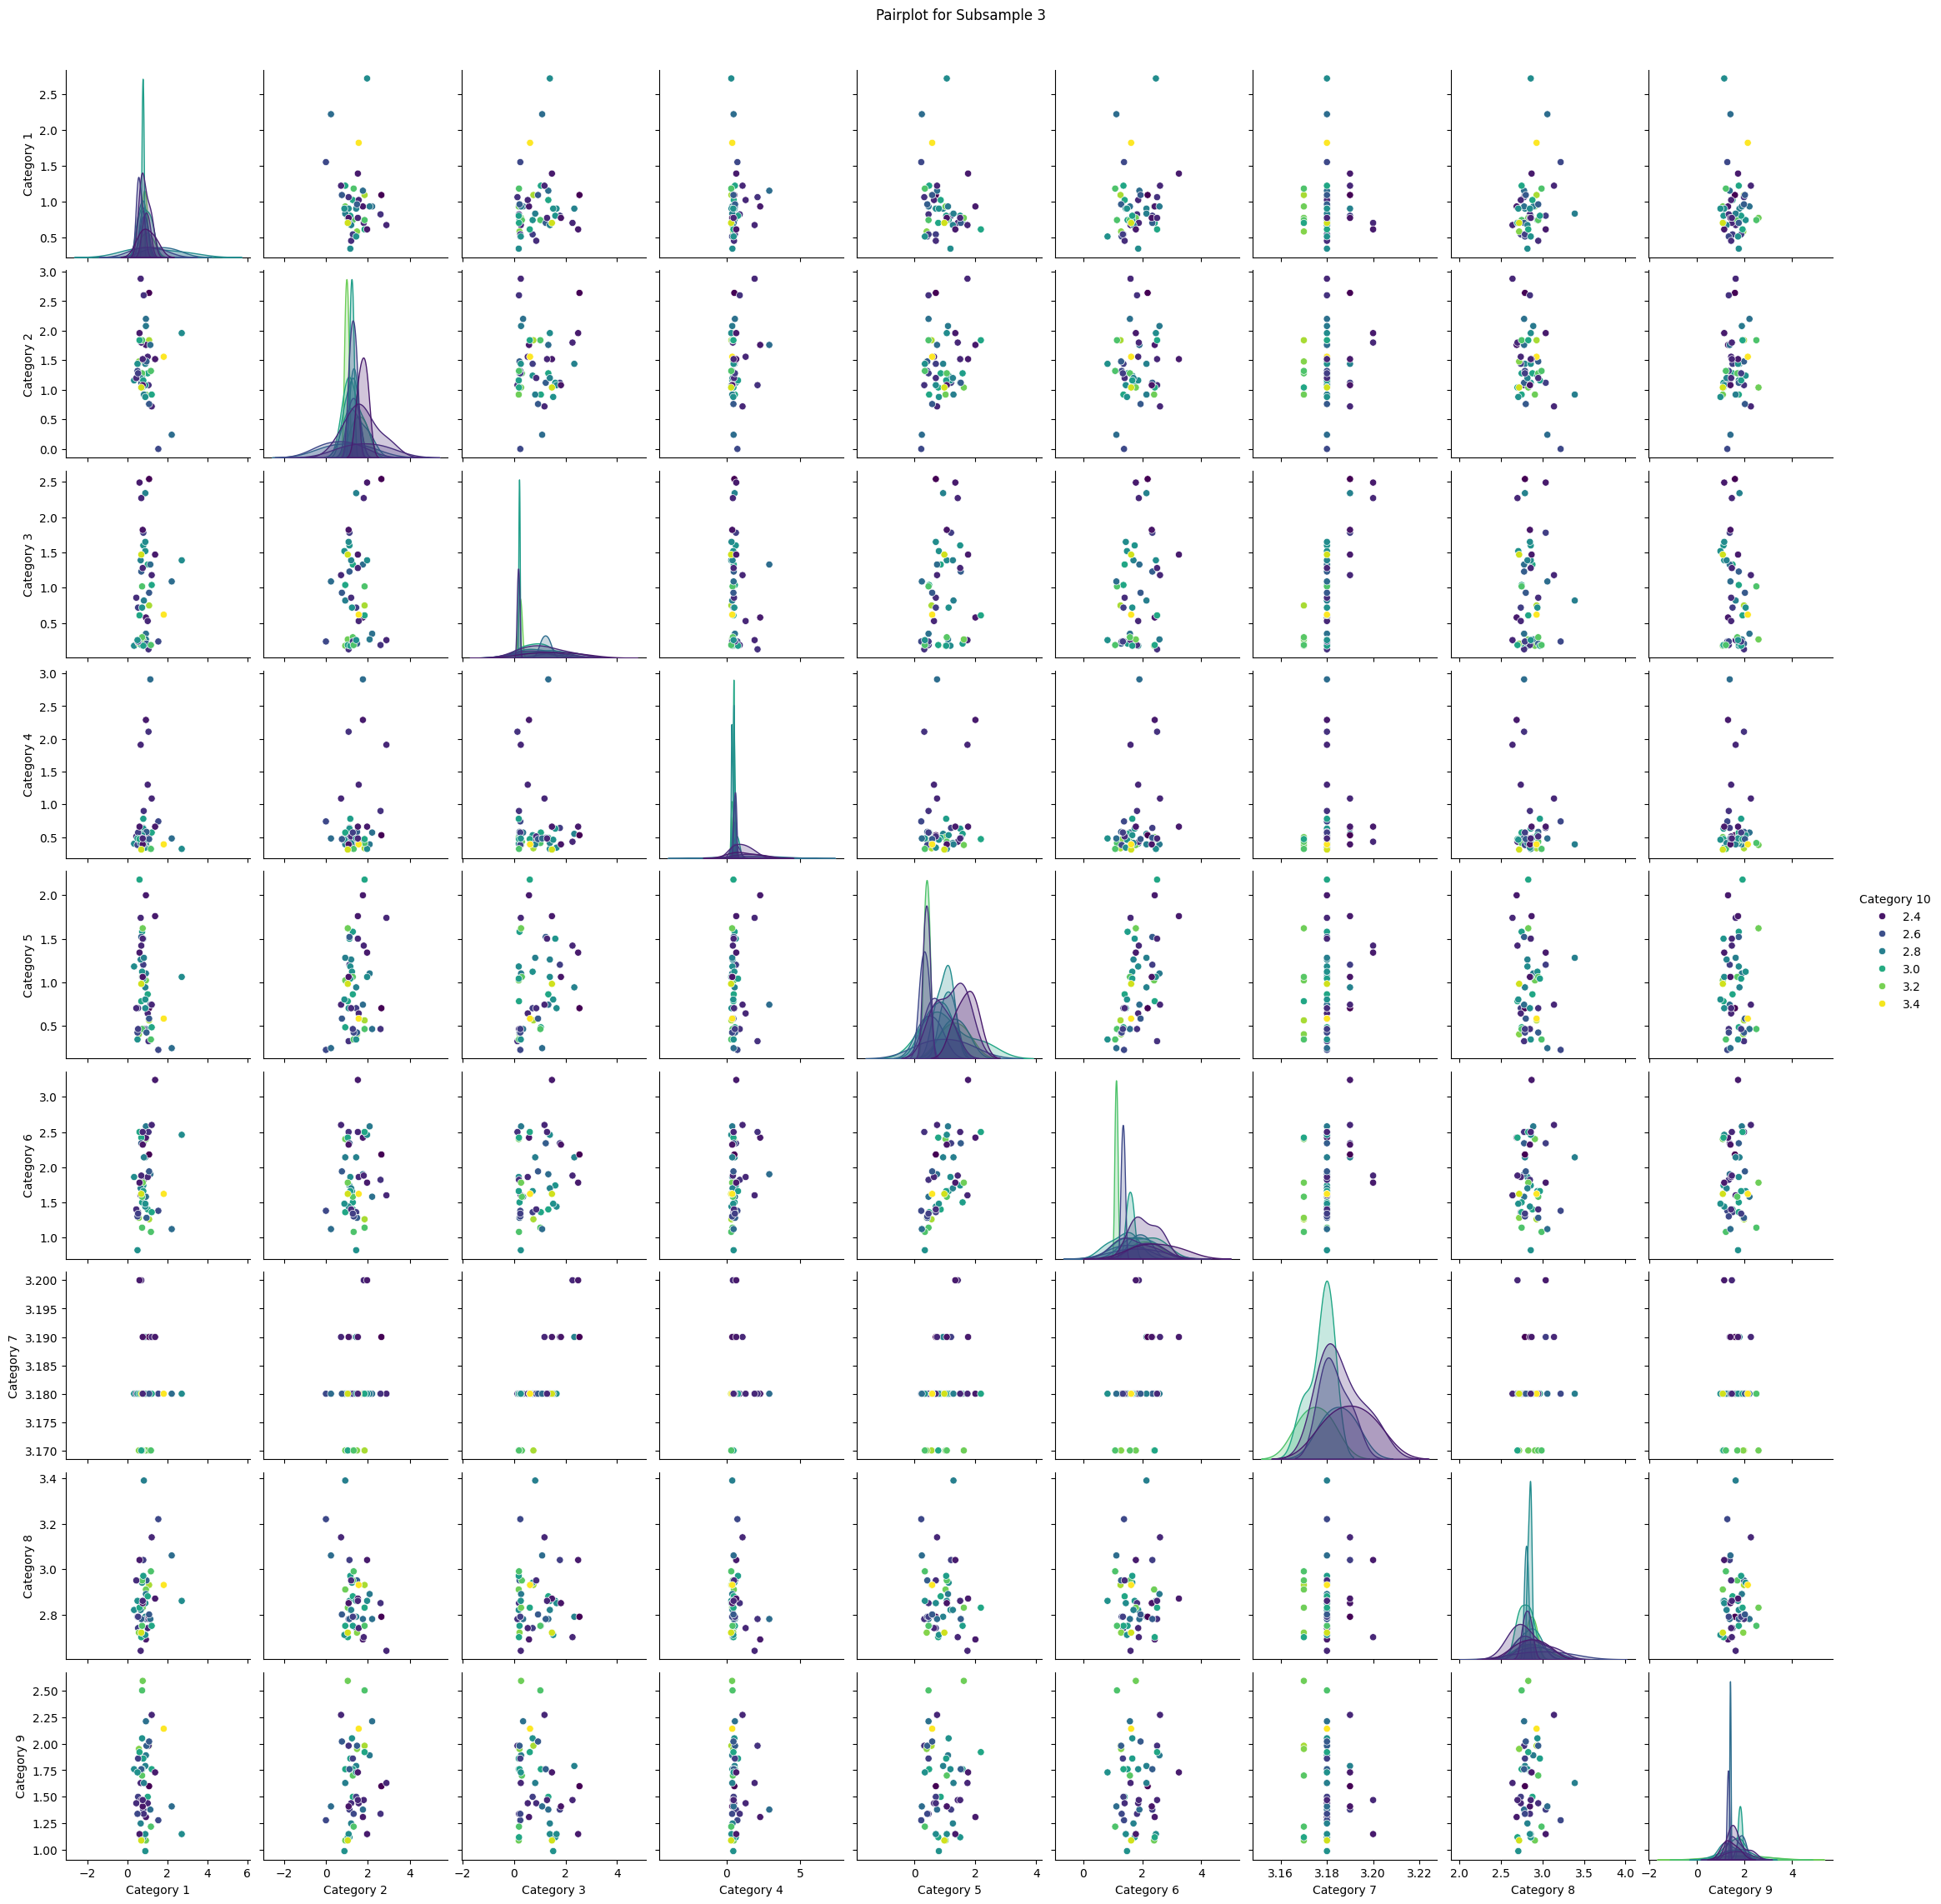

In [11]:
import seaborn as sns

# Adjusting the function to exclude non-numeric data and simplify pairplots
def plot_pairplots_subsamples(data, n_samples=3, sample_size=50, target='Category 10'):
    # Excluding non-numeric data
    numeric_data = data.select_dtypes(include=['float64'])
    for i in range(n_samples):
        # Take a random subsample
        subsample = numeric_data.sample(n=sample_size)
        # Create a pairplot with the target as 'Category 10'
        sns.pairplot(subsample, hue=target, palette='viridis')
        plt.suptitle(f'Pairplot for Subsample {i+1}', y=1.02)
        plt.show()

# Call the function to generate pairplots
plot_pairplots_subsamples(data)

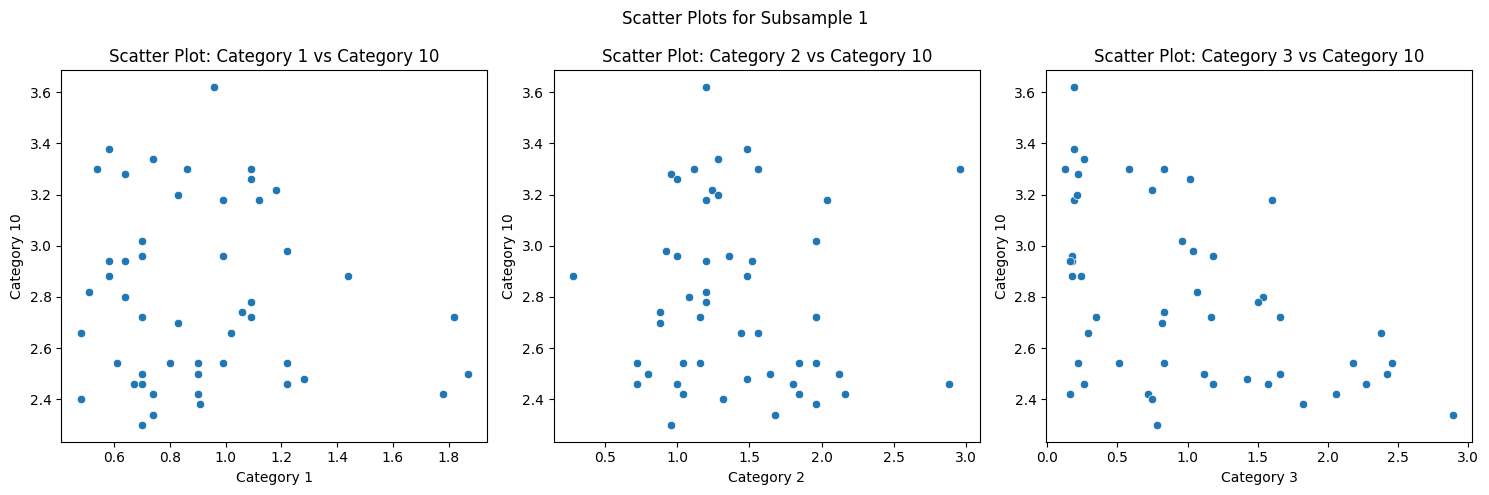

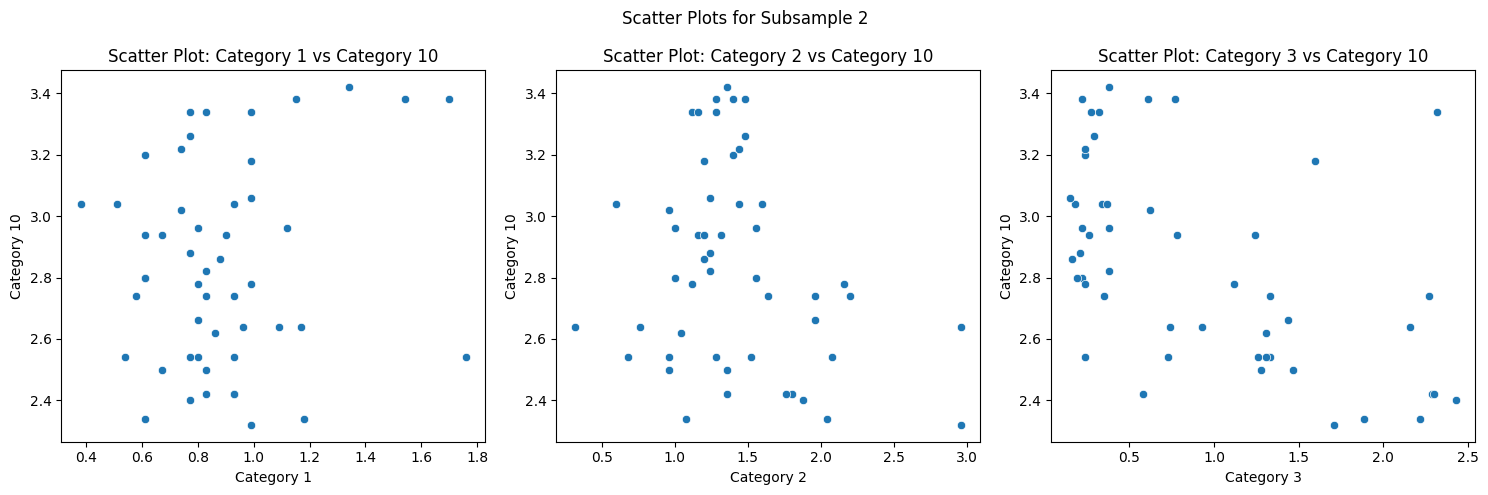

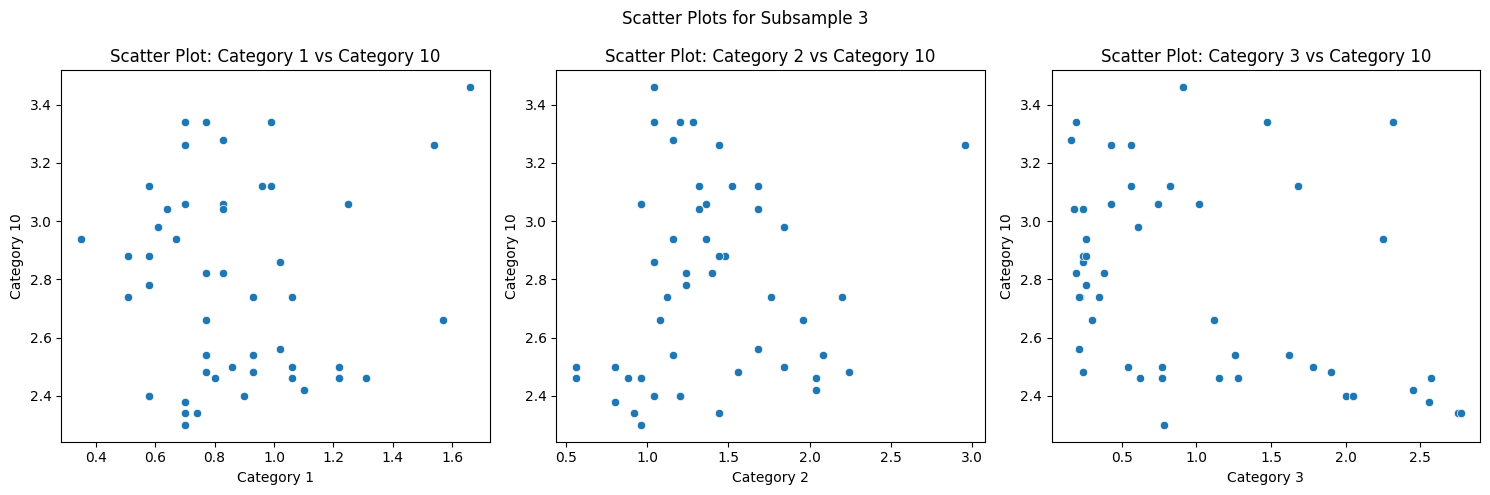

In [9]:
# Creating scatter plots for a selection of features against the target (Category 10)
def plot_scatter_subsamples(data, features, target='Category 10', n_samples=3, sample_size=50):
    for i in range(n_samples):
        # Take a random subsample
        subsample = data.sample(n=sample_size)
        # Set up the matplotlib figure
        fig, axes = plt.subplots(1, len(features), figsize=(15, 5))
        
        for idx, feature in enumerate(features):
            # Create scatter plot for each feature against the target
            sns.scatterplot(ax=axes[idx], x=subsample[feature], y=subsample[target])
            axes[idx].set_title(f'Scatter Plot: {feature} vs {target}')
            axes[idx].set_xlabel(feature)
            axes[idx].set_ylabel(target)

        plt.suptitle(f'Scatter Plots for Subsample {i+1}')
        plt.tight_layout()
        plt.show()

# Select three features to plot against the target
features_to_plot = ['Category 1', 'Category 2', 'Category 3']
plot_scatter_subsamples(data, features_to_plot)


**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

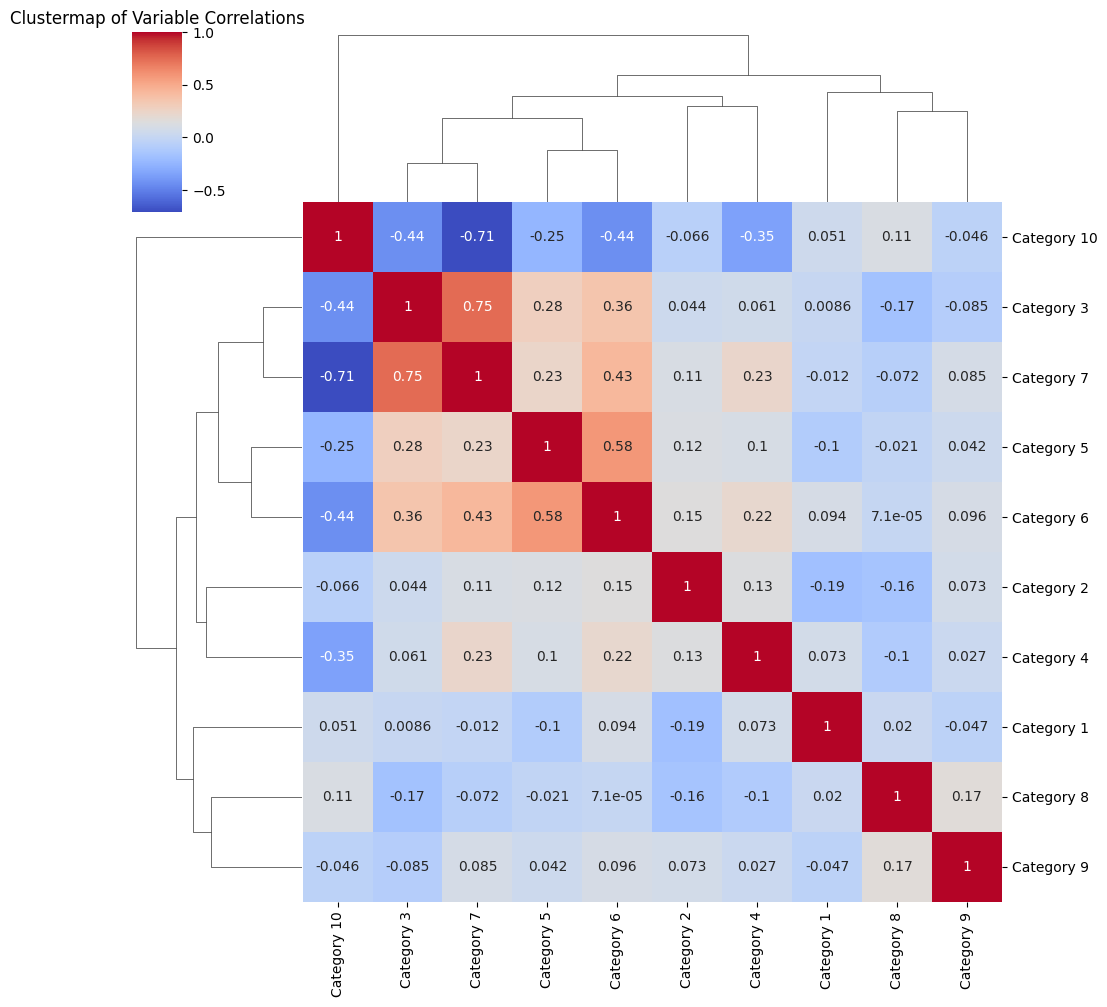

In [13]:
# Create a clustermap of the entire dataset excluding the 'User ID' column
sns.clustermap(data.drop(columns='User ID').corr(), annot=True, cmap='coolwarm', figsize=(10, 10))
plt.title('Clustermap of Variable Correlations')
plt.show()

#### Observation

The clustermap grouped categories with similar correlation patterns, helping identify which categories might behave similarly.

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Preparing data for SVM
# Using 'Category 10' as the target variable and others as features
X = data.drop(columns=['User ID', 'Category 10'])
y = data['Category 10']

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Setting up the SVM classifier
svm_model = SVC()

# Parameters for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Setting up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=1, scoring='accuracy')

# Fitting the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluating the model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
report = classification_report(y_test, y_pred)

best_params, best_score, report


Fitting 5 folds for each of 18 candidates, totalling 90 fits


ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/sklearn/svm/_base.py", line 743, in _validate_targets
    check_classification_targets(y)
  File "/opt/homebrew/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/sklearn/utils/multiclass.py", line 216, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


Support Vector Regression (SVR) is utilized instead of Support Vector Classification (SVC) because our target variable, Category 10, consists of continuous values rather than discrete categories. SVR is designed to handle this type of regression task where the goal is to predict a continuous output. On the other hand, SVC is used for classification tasks where the target variable is categorical, involving distinct classes or labels. Given the nature of our dataset, SVR is the appropriate choice to model and predict the ratings effectively, allowing us to explore relationships and make predictions based on the features in our dataset.

In [18]:
from sklearn.svm import SVR

# Setting up the SVM regressor
svm_regressor = SVR()

# Parameters for GridSearchCV
param_grid_regressor = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Setting up GridSearchCV for regression
grid_search_regressor = GridSearchCV(svm_regressor, param_grid_regressor, cv=5, verbose=1, scoring='neg_mean_squared_error')

# Fitting the grid search for regression
grid_search_regressor.fit(X_train, y_train)

# Best parameters and best score for regression
best_params_regressor = grid_search_regressor.best_params_
best_score_regressor = grid_search_regressor.best_score_

# Evaluating the regression model
best_svm_regressor = grid_search_regressor.best_estimator_
y_pred_regressor = best_svm_regressor.predict(X_test)

best_params_regressor, best_score_regressor


Fitting 5 folds for each of 18 candidates, totalling 90 fits


({'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}, -0.03765988841704795)

Here are the best parameters and the corresponding score:

Best Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score (Negative Mean Squared Error): -0.03766

The negative mean squared error is typically used in grid search for regression models to maximize the score; hence, a more negative value indicates poorer performance. In this case, this score represents how well the model fits the data under these parameters.
